# Data Input

In [19]:
import pandas as pd
df = pd.read_csv("/Users/chenhanlin/Dropbox/class (1)/EDA/Pre/london_weather.csv")
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


# Data Clean

In [20]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [21]:
df.isnull().any() #we can see there are a lot of null values, let's fill them 


date                False
cloud_cover          True
sunshine            False
global_radiation     True
max_temp             True
mean_temp            True
min_temp             True
precipitation        True
pressure             True
snow_depth           True
dtype: bool

In [22]:
import pandas as pd
fix = df.interpolate()

In [23]:
fix.isnull().any() #now there are no null values

date                False
cloud_cover         False
sunshine            False
global_radiation    False
max_temp            False
mean_temp           False
min_temp            False
precipitation       False
pressure            False
snow_depth          False
dtype: bool

In [24]:
fix.dtypes #check the data types 

date                  int64
cloud_cover         float64
sunshine            float64
global_radiation    float64
max_temp            float64
mean_temp           float64
min_temp            float64
precipitation       float64
pressure            float64
snow_depth          float64
dtype: object

In [25]:
fix = fix.astype(int) #change into integers 

In [26]:
fix['date'] = pd.to_datetime(fix['date'],format='%Y%m%d')# change type from integer to datetime format
fix.dtypes # check whether data types are appropriate 

date                datetime64[ns]
cloud_cover                  int64
sunshine                     int64
global_radiation             int64
max_temp                     int64
mean_temp                    int64
min_temp                     int64
precipitation                int64
pressure                     int64
snow_depth                   int64
dtype: object

# Data Analysis

## Q1

In [27]:
import matplotlib.pyplot as plt 
# extract the year from the data 
fix['year']=fix['date'].dt.year

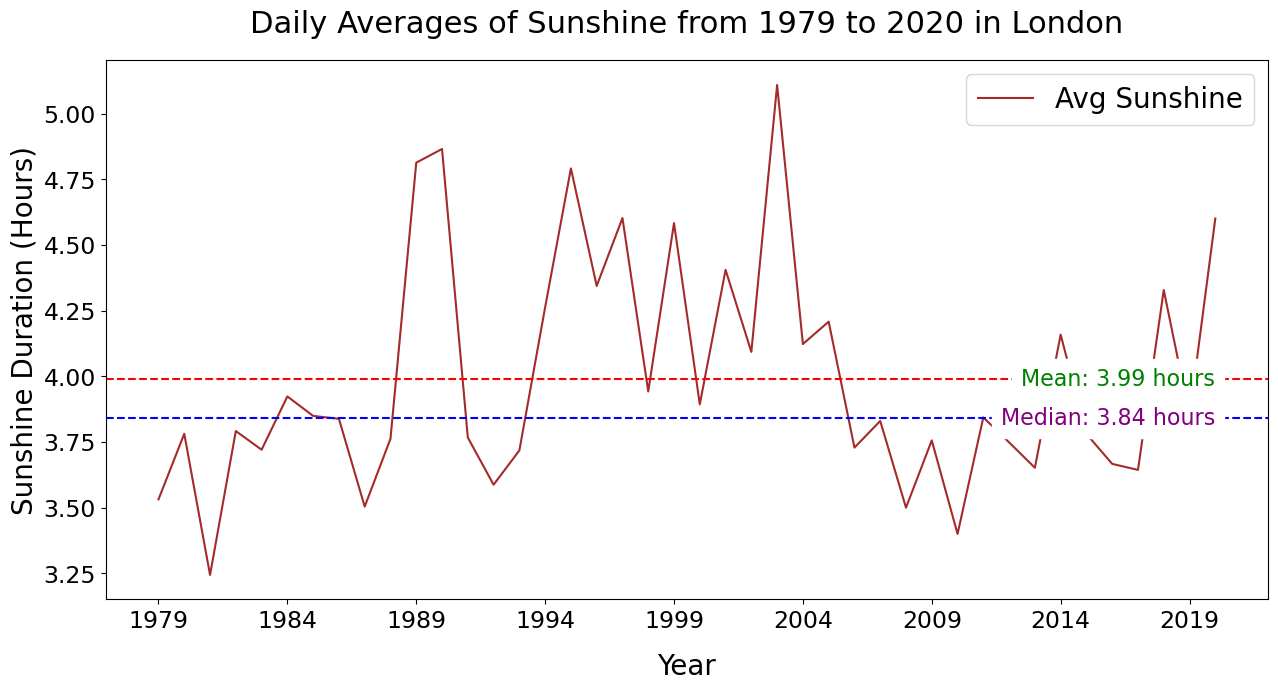

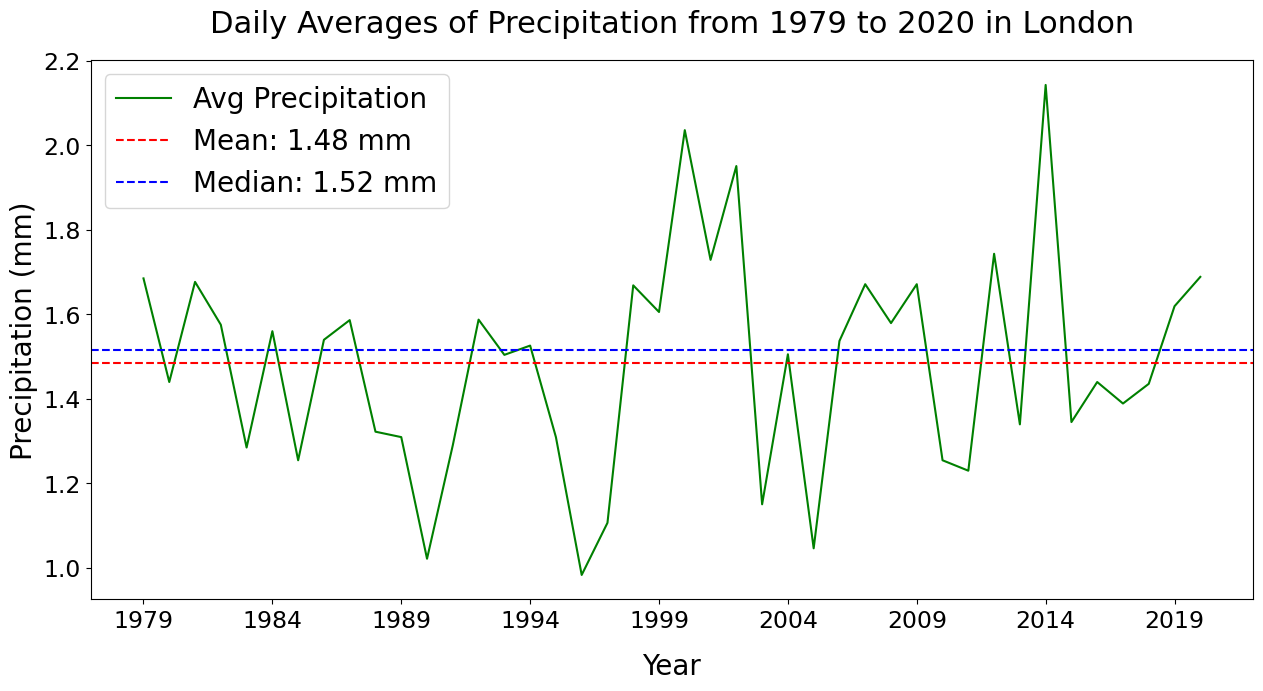

In [28]:
import matplotlib.pyplot as plt 
import seaborn as sns
yearly_avg = fix.groupby('year').agg({
    'cloud_cover':'mean',
    'mean_temp':'mean',
    'sunshine':'mean',
    'precipitation':'mean',
    'pressure':'mean',
    'global_radiation':'mean',
    'snow_depth':'mean'
})

# create the first plot for sunshine
plt.figure(figsize=(15, 7))
sns.lineplot(x=yearly_avg.index, y='sunshine', data=yearly_avg, label='Avg Sunshine', color='brown')
plt.title('Daily Averages of Sunshine from 1979 to 2020 in London',fontsize=22,pad=20)
plt.ylabel('Sunshine Duration (Hours)',fontsize=20)
plt.xlabel('Year',fontsize=20,labelpad=15)
plt.legend(fontsize=20)
plt.yticks(fontsize=17)

start_year = yearly_avg.index.min() 
end_year = yearly_avg.index.max()   
plt.xticks(range(start_year, end_year + 1, 5), fontsize=17)

# annotations
mean_sunshine =yearly_avg['sunshine'].mean()
median_sunshine=yearly_avg['sunshine'].median()
plt.axhline(mean_sunshine,color='red',linestyle='--')
plt.axhline(median_sunshine,color='blue',linestyle='--')

plt.text(yearly_avg.index[-1], mean_sunshine, f'Mean: {mean_sunshine:.2f} hours', 
         va='center', ha='right', backgroundcolor='w', color='green', fontsize=16)
plt.text(yearly_avg.index[-1], median_sunshine, f'Median: {median_sunshine:.2f} hours', 
         va='center', ha='right', backgroundcolor='w', color='purple', fontsize=16)

plt.show()

# create the second plot for precipitation
plt.figure(figsize=(15, 7))
sns.lineplot(x=yearly_avg.index, y='precipitation', data=yearly_avg, label='Avg Precipitation', color='green')
plt.title('Daily Averages of Precipitation from 1979 to 2020 in London',fontsize=22,pad=20)   
plt.ylabel('Precipitation (mm)',fontsize=20)
plt.xlabel('Year',fontsize=20,labelpad=15)
plt.yticks(fontsize=17)

start_year = yearly_avg.index.min() 
end_year = yearly_avg.index.max()   
plt.xticks(range(start_year, end_year + 1, 5), fontsize=17)

#annotations
mean_precipitation =yearly_avg['precipitation'].mean()
median_precipitation=yearly_avg['precipitation'].median()
plt.axhline(mean_precipitation,color='red',linestyle='--',label=f'Mean: {mean_precipitation:.2f} mm')
plt.axhline(median_precipitation,color='blue',linestyle='--',label=f'Median: {median_precipitation:.2f} mm')

plt.legend(fontsize=20)
plt.show()

## Q2

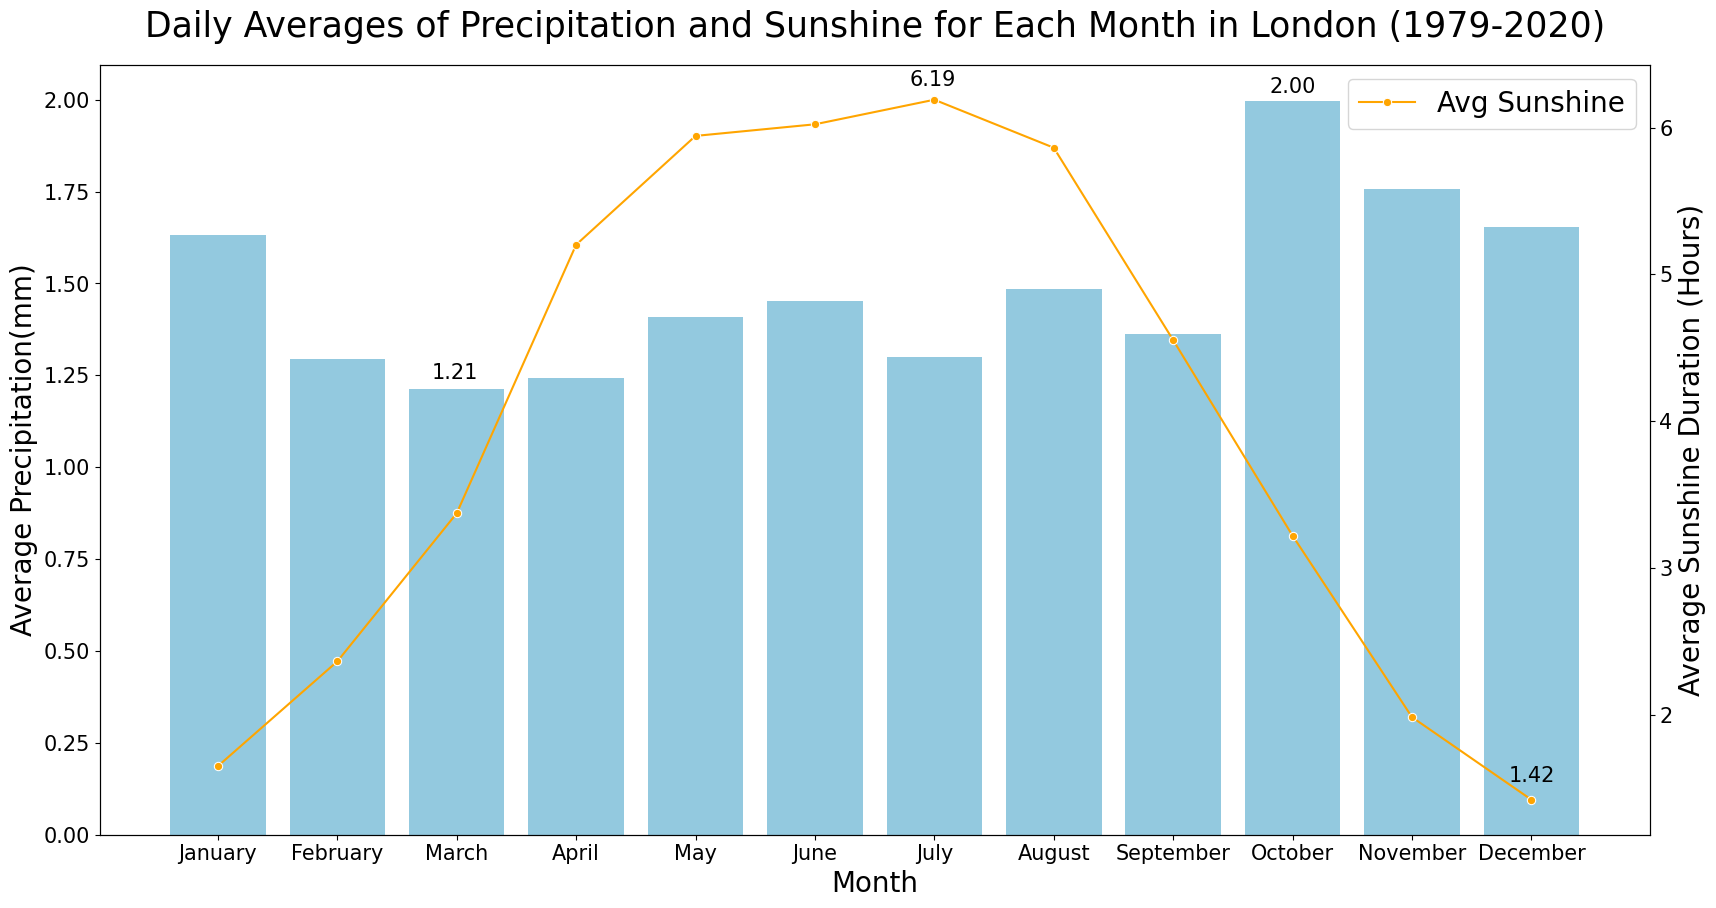

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import calendar
# extract the month from the data 
fix['month']=fix['date'].dt.month
# calculate monthly averages for the metrics
monthly_avg = fix.groupby('month').agg({
    'sunshine':'mean',
    'precipitation':'mean',
    'mean_temp':'mean'
}).reset_index()

monthly_avg['month'] = monthly_avg['month'].apply(lambda x: calendar.month_name[x])

plt.figure(figsize=(20,10))
# create bar plot for average precipitation
ax1 = sns.barplot(x='month', y='precipitation', data=monthly_avg, color='skyblue', label='Avg Precipitation') 
ax1.set_ylabel('Average Precipitation(mm)', fontsize=20)
ax1.set_xlabel('Month', fontsize=20)
ax1.set_title('Daily Averages of Precipitation and Sunshine for Each Month in London (1979-2020)', fontsize=25, pad=20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)


#create line plot in the same picture 
ax2 = ax1.twinx()
sunshine_plot = sns.lineplot(x='month', y='sunshine', data=monthly_avg, marker='o', color='orange', label='Avg Sunshine', ax=ax2)
ax2.set_ylabel('Average Sunshine Duration (Hours)', fontsize=20)
ax2.legend(loc='upper right', fontsize=20)
ax2.tick_params(axis='y', labelsize=15)


# annotate the max and min of precipitation and sunshine
max_precipitation = monthly_avg['precipitation'].max()
min_precipitation = monthly_avg['precipitation'].min()
max_sunshine = monthly_avg['sunshine'].max()
min_sunshine = monthly_avg['sunshine'].min()

# get the month for max and min values
max_precipitation_month = monthly_avg['precipitation'].idxmax()
min_precipitation_month = monthly_avg['precipitation'].idxmin()
max_sunshine_month = monthly_avg['sunshine'].idxmax()
min_sunshine_month = monthly_avg['sunshine'].idxmin()

# annotate on the bar plot (precipitation)
ax1.annotate(f'{max_precipitation:.2f}', 
             xy=(max_precipitation_month - 1, max_precipitation), 
             xytext=(86, 3), 
             textcoords='offset points', 
             ha='center', 
             va='bottom',
             fontsize=15) 

ax1.annotate(f'{min_precipitation:.2f}',
             xy=(min_precipitation_month - 1, min_precipitation),
             xytext=(85, 4),
             textcoords='offset points',
             ha='center',
             va='bottom',
             fontsize=15)

# annotate on the line plot (sunshine)
ax2.annotate(f'{max_sunshine:.2f}',
             xy=(max_sunshine_month - 1, max_sunshine),
             xytext=(85, 7),
             textcoords='offset points',
             ha='center',
             va='bottom',
             fontsize=15)

ax2.annotate(f'{min_sunshine:.2f}',
             xy=(min_sunshine_month - 1, min_sunshine),
             xytext=(86, 10),
             textcoords='offset points',
             ha='center',
             va='bottom',
             fontsize=15)

# show the plot
plt.show()

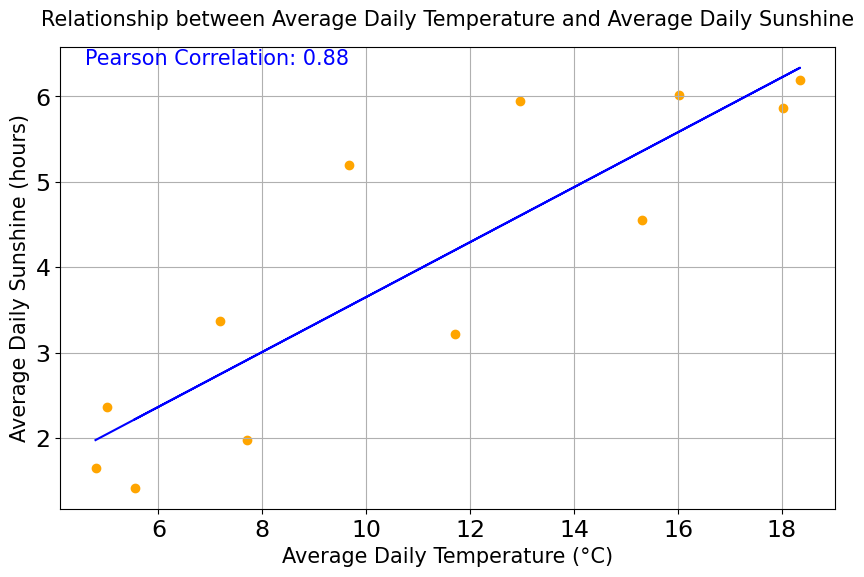

PearsonRResult(statistic=0.8788019645498905, pvalue=0.00016746416363140452)

In [30]:
import numpy as np

from scipy.stats import pearsonr

# calculate the Pearson correlation coefficient between average daily temperature and sunshine
temp_sunshine_corr = np.corrcoef(monthly_avg['mean_temp'],monthly_avg['sunshine'])[0, 1]

# create a scatter plot and fit a linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(monthly_avg['mean_temp'], monthly_avg['sunshine'], color='orange')

# calculate the linear regression line
m_corrected, b_corrected = np.polyfit(monthly_avg['mean_temp'], monthly_avg['sunshine'], 1)

# add the linear regression line to the scatterplot
plt.plot(monthly_avg['mean_temp'], m_corrected*monthly_avg['mean_temp']+ b_corrected, color='blue')

# add titles and labels
plt.title('Relationship between Average Daily Temperature and Average Daily Sunshine',fontsize=15,pad=15)
plt.xlabel('Average Daily Temperature (°C)',fontsize=15)
plt.ylabel('Average Daily Sunshine (hours)',fontsize=15)
plt.grid(True)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# show plot along with the correlation coefficient
p_value = pearsonr(monthly_avg['mean_temp'],monthly_avg['sunshine'])
plt.figtext(0.15, 0.85, f'Pearson Correlation: {temp_sunshine_corr:.2f}', fontsize=15, ha='left', color='blue')
plt.show()

temp_sunshine_corr
p_value


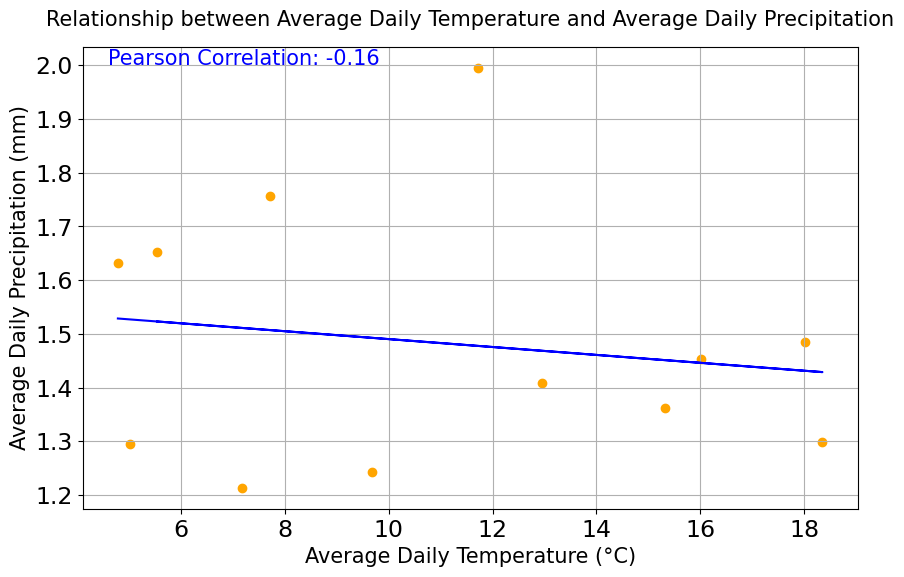

(-0.15845045739932143,
 PearsonRResult(statistic=-0.15845045739932134, pvalue=0.6228251707001026))

In [18]:
# calculate the Pearson correlation coefficient between average daily temperature and sunshine
temp_precipitation_corr = np.corrcoef(monthly_avg['mean_temp'],monthly_avg['precipitation'])[0, 1]

# create a scatter plot and fit a linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(monthly_avg['mean_temp'], monthly_avg['precipitation'], color='orange')

# calculate the linear regression line
m_corrected, b_corrected = np.polyfit(monthly_avg['mean_temp'], monthly_avg['precipitation'], 1)

# add the linear regression line to the scatterplot
plt.plot(monthly_avg['mean_temp'], m_corrected*monthly_avg['mean_temp']+ b_corrected, color='blue')

# add titles and labels
plt.title('Relationship between Average Daily Temperature and Average Daily Precipitation',fontsize=15,pad=15)
plt.xlabel('Average Daily Temperature (°C)',fontsize=15)
plt.ylabel('Average Daily Precipitation (mm)',fontsize=15)
plt.grid(True)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# show plot along with the correlation coefficient
plt.figtext(0.15, 0.85, f'Pearson Correlation: {temp_precipitation_corr:.2f}', fontsize=15, ha='left', color='blue')
plt.show()

p_value = pearsonr(monthly_avg['mean_temp'],monthly_avg['precipitation'])

temp_precipitation_corr,p_value